# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


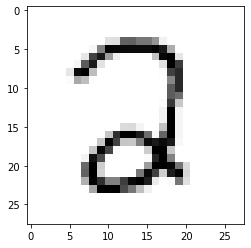

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2381437562516237
train accuracy is: 0.7134868970121849, test accuracy is 0.7202620967741935


Epoch 10 Loss 0.12469295530884615
train accuracy is: 0.900934735436488, test accuracy is 0.9168346774193549


Epoch 20 Loss 0.06761473602872803
train accuracy is: 0.9312301786012351, test accuracy is 0.9440524193548387


Epoch 30 Loss 0.05030930603806988
train accuracy is: 0.9452512101485562, test accuracy is 0.954133064516129


Epoch 40 Loss 0.04239577652598948
train accuracy is: 0.9505090969788015, test accuracy is 0.9586693548387096


Epoch 50 Loss 0.03784565516890079
train accuracy is: 0.9556835252879319, test accuracy is 0.9611895161290323


Epoch 60 Loss 0.03482394175340869
train accuracy is: 0.9606075780337172, test accuracy is 0.9642137096774194


Epoch 70 Loss 0.03260113105250355
train accuracy is: 0.9622767484560174, test accuracy is 0.9642137096774194


Epoch 80 Loss 0.030855727468004544
train accuracy is: 0.9640293773994325, test accuracy is 0.9657258064516129


Epoch 90 Loss 0.029420849285906294
train accuracy is: 0.9654481722583875, test accuracy is 0.9667338709677419


Epoch 100 Loss 0.028199153797074415
train accuracy is: 0.9672842597229178, test accuracy is 0.9667338709677419


Epoch 110 Loss 0.02714564989705627
train accuracy is: 0.9684526790185278, test accuracy is 0.9692540322580645


Epoch 120 Loss 0.026213415118760935
train accuracy is: 0.9697880153563679, test accuracy is 0.9717741935483871


Epoch 130 Loss 0.025385289160326344
train accuracy is: 0.9705391420464029, test accuracy is 0.9722782258064516


Epoch 140 Loss 0.024639845344971868
train accuracy is: 0.971791019863128, test accuracy is 0.9727822580645161


Epoch 150 Loss 0.023957917717620954
train accuracy is: 0.9727925221165081, test accuracy is 0.9727822580645161


Epoch 160 Loss 0.02332508907009877
train accuracy is: 0.9735436488065431, test accuracy is 0.9722782258064516


Epoch 170 Loss 0.022747796719326547
train accuracy is: 0.9742947754965782, test accuracy is 0.9722782258064516


Epoch 180 Loss 0.022197874838392837
train accuracy is: 0.9753797362710733, test accuracy is 0.9722782258064516


Epoch 190 Loss 0.021678551515344084
train accuracy is: 0.9760474044399933, test accuracy is 0.9722782258064516


Epoch 200 Loss 0.021176743690380976
train accuracy is: 0.9764646970455684, test accuracy is 0.9732862903225806


Epoch 210 Loss 0.02070188599345313
train accuracy is: 0.9772158237356035, test accuracy is 0.9737903225806451


Epoch 220 Loss 0.020241337025615393
train accuracy is: 0.9778000333834085, test accuracy is 0.9742943548387096


Epoch 230 Loss 0.01979565964835428
train accuracy is: 0.9781338674678685, test accuracy is 0.9747983870967742


Epoch 240 Loss 0.01936204988092036
train accuracy is: 0.9787180771156735, test accuracy is 0.9747983870967742


0.007938967211582153

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.22650454561809952
train accuracy is: 0.7341011517275914, test accuracy is 0.7308467741935484


Epoch 10 Loss 0.10090146398572011
train accuracy is: 0.9086129193790686, test accuracy is 0.9233870967741935


Epoch 20 Loss 0.07812091168798536
train accuracy is: 0.92864296444667, test accuracy is 0.938508064516129


Epoch 30 Loss 0.06746700444827483
train accuracy is: 0.9377399432482056, test accuracy is 0.9490927419354839


Epoch 40 Loss 0.06103616969193985
train accuracy is: 0.942830913036221, test accuracy is 0.952116935483871


Epoch 50 Loss 0.05665051457698232
train accuracy is: 0.9462527124019362, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.053428094351359
train accuracy is: 0.9486730095142714, test accuracy is 0.9561491935483871


Epoch 70 Loss 0.050937294166751725
train accuracy is: 0.9498414288098815, test accuracy is 0.9581653225806451


Epoch 80 Loss 0.048939460894614976
train accuracy is: 0.9513436821899516, test accuracy is 0.9601814516129032


Epoch 90 Loss 0.04729072766766036
train accuracy is: 0.9525955600066767, test accuracy is 0.9627016129032258


Epoch 100 Loss 0.04590073548570159
train accuracy is: 0.9536805207811717, test accuracy is 0.9642137096774194


Epoch 110 Loss 0.04470746139120179
train accuracy is: 0.9545985645134368, test accuracy is 0.9647177419354839


Epoch 120 Loss 0.04366836335992782
train accuracy is: 0.9554331497245869, test accuracy is 0.9652217741935484


Epoch 130 Loss 0.04275272466563704
train accuracy is: 0.9559339008512769, test accuracy is 0.9652217741935484


Epoch 140 Loss 0.041937480864357564
train accuracy is: 0.956601569020197, test accuracy is 0.9652217741935484


Epoch 150 Loss 0.04120490134606268
train accuracy is: 0.957102320146887, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.04054159906748106
train accuracy is: 0.957603071273577, test accuracy is 0.9647177419354839


Epoch 170 Loss 0.03993791884842546
train accuracy is: 0.958020363879152, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.039385114738137064
train accuracy is: 0.958604573526957, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.03887555296039987
train accuracy is: 0.9591053246536472, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.038403935630262134
train accuracy is: 0.9596895343014522, test accuracy is 0.9657258064516129


Epoch 210 Loss 0.037966276022216285
train accuracy is: 0.9601068269070272, test accuracy is 0.9657258064516129


Epoch 220 Loss 0.03755845094630317
train accuracy is: 0.9604406609914873, test accuracy is 0.9652217741935484


Epoch 230 Loss 0.037176313978244974
train accuracy is: 0.9606910365548322, test accuracy is 0.9657258064516129


Epoch 240 Loss 0.036818608807131836
train accuracy is: 0.9608579535970623, test accuracy is 0.9662298387096774


0.05265650459542761

### Comparing results of NN and LR

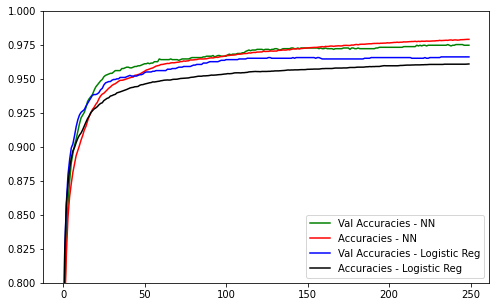

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

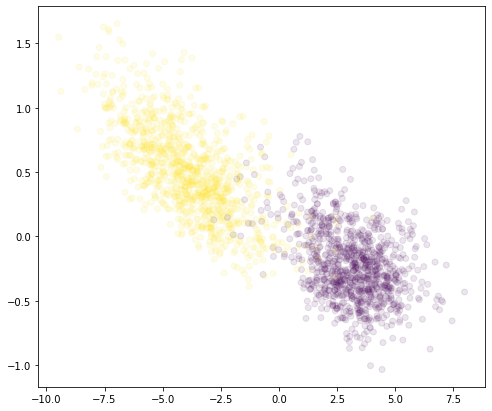

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

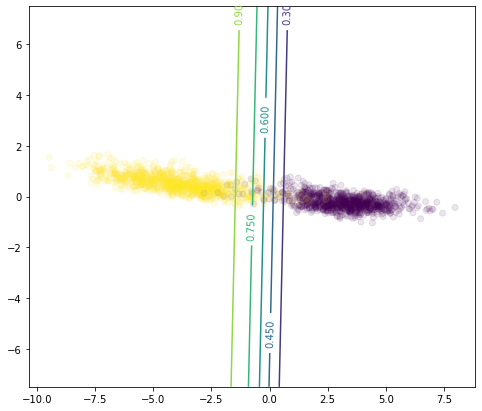

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );